In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Task 1**

### **1.	Define two Numpy arrays x and y   which represents BMI and Cholesterol**

In [ ]:
X = np.array([5, 15, 25, 35, 45, 55])
Y = np.array([11, 16, 18, 30, 22, 38])

### **2.	Plot a scatter plot of x and y.**

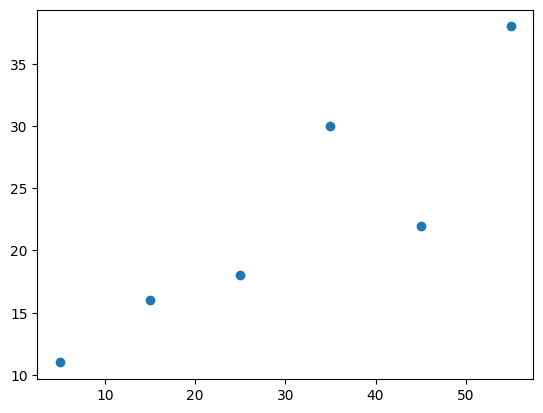

In [ ]:
plt.scatter(X, Y)

### **3.	Write a python function to compute the values of the coefficients of linear regression, b0 and b1.**

In [7]:
def linear_regression(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  x_minus = (x - x_mean)
  y_minus = (y - y_mean)

  prod = x_minus*y_minus
  sqr = x_minus*x_minus

  b1 = prod.sum()/sqr.sum()
  b0 = y_mean - b1*x_mean

  return b0, b1


In [ ]:
b0, b1 = linear_regression(X, Y)
print(b0, b1)

8.357142857142858 0.4714285714285714


### **4.	Determine the predicted value of y for x=27.**

In [13]:
def y_predictor(b0, b1, x):
  return b0 + b1*x

In [ ]:
Y_predicted = y_predictor(b0, b1, 27)
Y_predicted

### **5.	Plot the regression line on the scatter plot.**

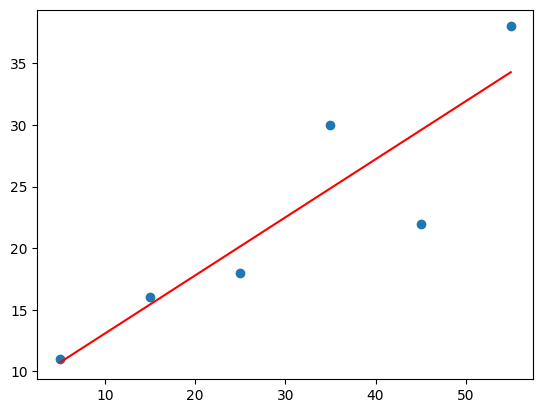

In [ ]:
plt.scatter(X, Y)
plt.plot(X, y_predictor(b0, b1, X), 'r')
plt.show()

### **6.	Write a python function to determine the value of r2.**

In [8]:
def sum_of_squared(y, y_predicted):
  return ((y - y_predicted)**2).sum()

In [15]:
def determination_coefficient(x, y):
  y_mean = np.mean(y)

  b0, b1 = linear_regression(x, y)
  y_lr = y_predictor(b0, b1, x)

  SST = sum_of_squared(y, y_mean)
  SSE = sum_of_squared(y, y_lr)

  print(SSE, SST)

  determination_coeff = 1 - (SSE/SST)

  return determination_coeff


In [3]:
X = np.array([0, 1, 2, 3, 4, 5])
Y = np.array([110, 100, 250, 275, 230, 300])

In [16]:
r_squared = determination_coefficient(X, Y)
r_squared

9803.333333333336 36420.83333333333


0.7308317126186934

## **Task 2**

### **1.	Import LinearRegression from SKlearn.**

In [ ]:
from sklearn.linear_model import LinearRegression

### **2.	Reshape x to make it two dimensional array.**

In [ ]:
input = X[:, np.newaxis]
output = Y[:, np.newaxis]

### **3.	Create a model for linear regression.**

In [ ]:
reg = LinearRegression()

### **4.	Train the model using model.fit**

In [ ]:
reg.fit(input, output)

LinearRegression()

### **5.	Determine the value of intercept (b0) and slope(b1). Compare the values as obtained from task 1.**

In [ ]:
# b0
reg.intercept_

array([8.35714286])

In [ ]:
# b1
reg.coef_

array([[0.47142857]])

**Determine the predicted value of y for x=27.**

In [ ]:
input_1 = np.array([27])

reg.predict(input_1[:, np.newaxis])

array([[21.08571429]])

### **6.	Determine the value of r2. Compare the value with the one obtained in task 1.**

In [ ]:
# r_squared
reg.score(input, output)

0.7913094027030955

The results are same as found in task 1

## **Task 3**

In [ ]:
import pandas as pd

### **1.	Import salary.csv into your notebooks.**

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')

### **2.	Explore the dataset using head and describe.**

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### **3.	Repeat steps 2 to 6 from task 2.**

In [ ]:
i = df['YearsExperience']
o = df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
i_train, i_test, o_train, o_test = train_test_split(i, o, test_size = 0.2, random_state = 0)

In [ ]:
i_train = np.array([i_train])
o_train = np.array([o_train])

i_test = np.array([i_test])
o_test = np.array([o_test])

In [ ]:
i_train = i_train.reshape(-1, 1)
o_train = o_train.reshape(-1, 1)

i_test = i_test.reshape(-1, 1)
o_test = o_test.reshape(-1, 1)

In [ ]:
reg_df = LinearRegression()

In [ ]:
reg.fit(i_train, o_train)

LinearRegression()

In [ ]:
print(reg_df.intercept_)
print(reg_df.coef_)
print(reg_df.score(i_train, o_train))

[26780.09915063]
[[9312.57512673]]
0.9411949620562126


ValueError: s must be a scalar, or float array-like with the same size as x and y

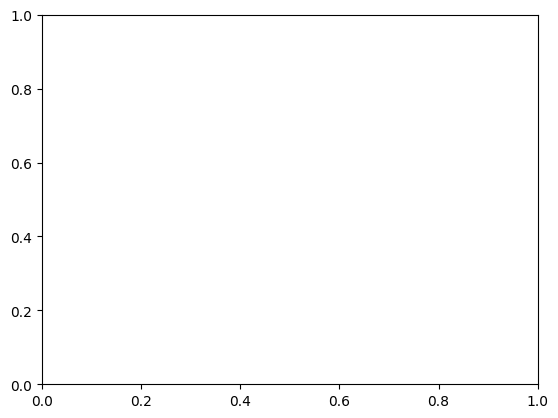

In [ ]:
plt.scatter(i_train, o_train, 'r')
plt.plot(i_train, reg_df.predict(i_train), 'b')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
o_pred = reg_df.predict(i_test)
o_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

ValueError: s must be a scalar, or float array-like with the same size as x and y

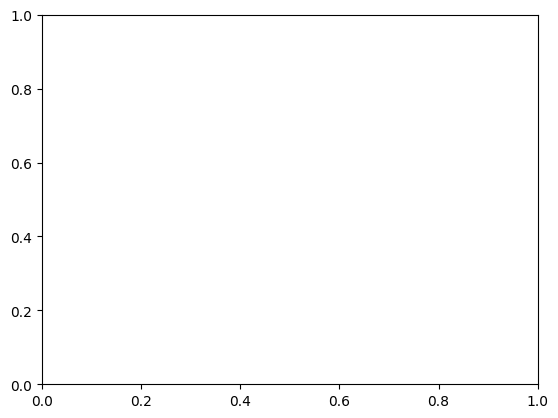

In [ ]:
plt.scatter(i_train, o_train, 'r')
plt.plot(i_test, o_pred, 'b')
plt.title('Salary vs Experience (testing set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(o_test, o_pred)
r2

0.988169515729126

### **4.	Plot a scatter plot of work experience vs salary**

<Axes: xlabel='YearsExperience', ylabel='Salary'>

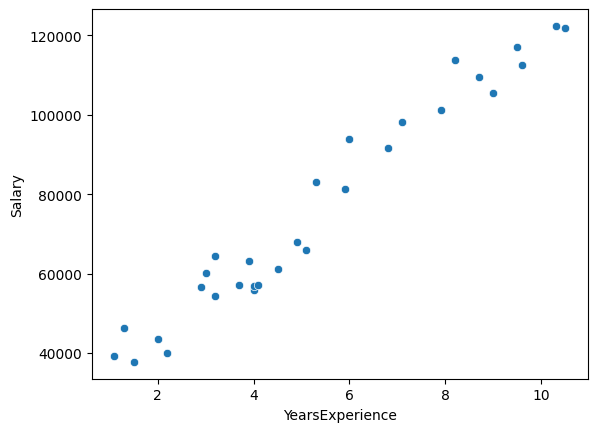

In [ ]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

### **5.	You can cross verify with your function written by**

In [ ]:
print(linear_regression(df['YearsExperience'], df['Salary']))
print(determination_coefficient(df['YearsExperience'], df['Salary']))

(25792.20019866869, 9449.962321455077)
0.9569566641435086
